In [50]:
import os
import tkinter as tk
from tkinter.colorchooser import askcolor
from tkinter.simpledialog import askstring
from PIL import Image, ImageDraw
import numpy as np
from PIL import Image
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random

# Draw Tool

In [51]:
class PaintApp:
    def __init__(self, root, canvas_size=(28, 28), scale=10):
        self.root = root
        self.root.title("Simple Paint App")
        
        # Scale settings
        self.canvas_size = canvas_size
        self.scale = scale
        self.display_size = (canvas_size[0] * scale, canvas_size[1] * scale)

        # Default settings
        self.brush_color = "black"
        self.brush_size = 20  # This is the display brush size
 
        # Set up Canvas
        self.canvas = tk.Canvas(root, bg="white", width=self.display_size[0], height=self.display_size[1])
        self.canvas.pack()

        # Set up PIL image to draw on and save later (true 28x28 resolution)
        self.image = Image.new("RGB", self.canvas_size, "white")
        self.draw = ImageDraw.Draw(self.image)

        # Canvas bindings
        self.canvas.bind("<B1-Motion>", self.paint)
        self.canvas.bind("<Button-1>", self.paint)  # Allow single clicks to paint
        
        # Set up UI for color and brush size
        self.setup_ui()

    def setup_ui(self):
        # Label input
        self.label_button = tk.Button(self.root, text="Set Label", command=self.set_label)
        self.label_button.pack(side="left")

        # Color button
        color_button = tk.Button(self.root, text="Choose Color", command=self.choose_color)
        color_button.pack(side="left")

        # Clear button
        clear_button = tk.Button(self.root, text="Clear", command=self.clear_canvas)
        clear_button.pack(side="left")

        # Save button
        save_button = tk.Button(self.root, text="Save", command=self.save_image)
        save_button.pack(side="left")

        # Default label
        self.label = "image"

    def set_label(self):
        label = askstring("Set Label", "Enter label for image filename:")
        if label:
            self.label = label
            print(f"Label set to '{self.label}'")

    def choose_color(self):
        color = askcolor(color=self.brush_color)[1]
        if color:
            self.brush_color = color

    def paint(self, event):
        # Calculate scaled-down coordinates for the 28x28 image
        scaled_x, scaled_y = int(event.x / self.scale), int(event.y / self.scale)

        # Draw on the displayed canvas (scaled-up, with ovals)
        x, y = event.x, event.y
        r = self.brush_size / 2
        self.canvas.create_oval(x - r, y - r, x + r, y + r, fill=self.brush_color, outline="")

        # Draw a smaller oval on the 28x28 PIL image to represent the scaled effect
        scaled_r = max(1, int(r / self.scale))  # Ensure the brush size is at least 1 in the 28x28 scale
        self.draw.ellipse([scaled_x - scaled_r, scaled_y - scaled_r, scaled_x + scaled_r, scaled_y + scaled_r], fill=self.brush_color)

    def clear_canvas(self):
        # Clear the tkinter canvas
        self.canvas.delete("all")
        # Clear the 28x28 PIL image
        self.draw.rectangle([0, 0, *self.canvas_size], fill="white")

    def save_image(self):
        # Save the 28x28 image with the specified label
        img_number = 1
        filename = f"data/{self.label}_{img_number}.png"
        
        # Ensure filename is unique
        while os.path.exists(filename):
            img_number += 1
            filename = f"data/{self.label}_{img_number}.png"
        
        # Make directory if it doesn't exist
        os.makedirs("data", exist_ok=True)

        self.image.save(filename)
        print(f"Image saved as {filename}")

        self.clear_canvas()

# Run the application
root = tk.Tk()
app = PaintApp(root)
root.mainloop()


# Data Prep

In [52]:
def load_data():
    data = []
    labels = []
    for file in os.listdir("data"):
        if file.endswith(".png"):
            img = Image.open("data/" + file)
            img = img.convert("L")
            img = img.resize((28, 28))
            img = np.array(img)
            img = img.flatten()
            data.append(img)
            labels.append(int(file.split("_")[0]))
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

data, labels = load_data()

print("X shape:", data.shape)
print("y shape:", labels.shape)

# Create sklearn neural network to classify the digits
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(data, labels, test_size=0.2)

# Normalize the data
X_train_custom = X_train_custom / 255
X_test_custom = X_test_custom / 255

print("Training data shape:", X_train_custom.shape)
print("Testing data shape:", X_test_custom.shape)

X shape: (499, 784)
y shape: (499,)
Training data shape: (399, 784)
Testing data shape: (100, 784)


# Random Forest Classifier

Accuracy: 0.92


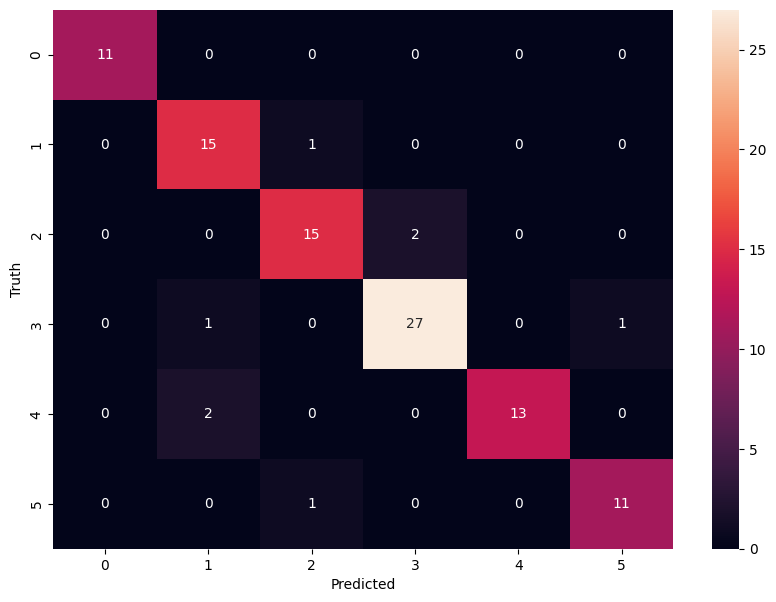

Accuracy: 0.77


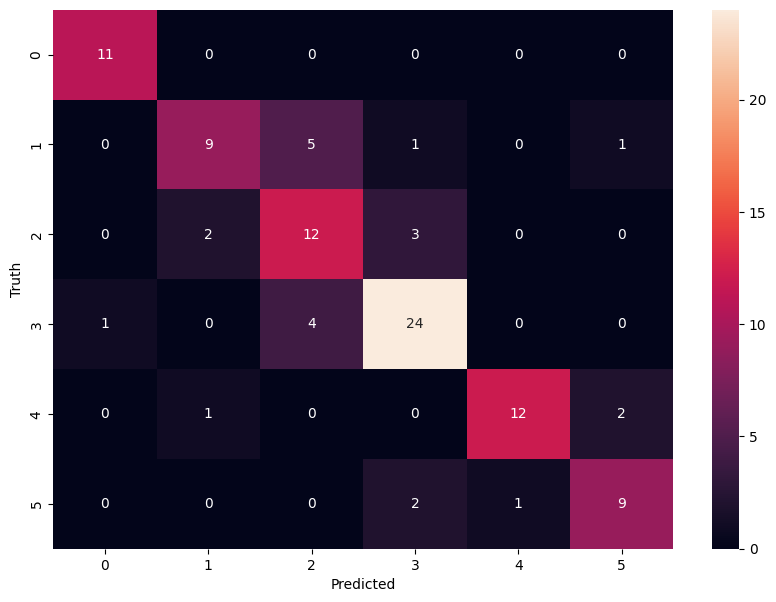

In [53]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_custom, y_train_custom)
print("Accuracy:", clf.score(X_test_custom, y_test_custom))

# confusion matrix
y_pred = clf.predict(X_test_custom)
cm = confusion_matrix(y_test_custom, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_custom, y_train_custom)
print("Accuracy:", clf.score(X_test_custom, y_test_custom))

# confusion matrix
y_pred = clf.predict(X_test_custom)
cm = confusion_matrix(y_test_custom, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# MLP Classifier

0.87


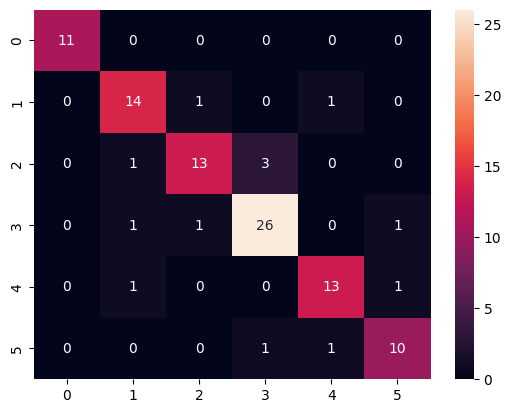

Correct predictions:


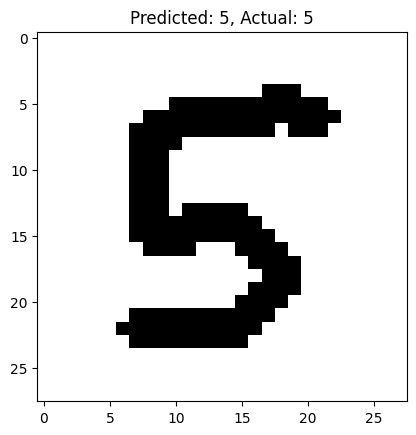

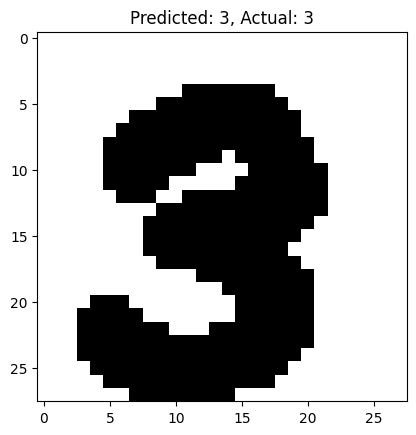

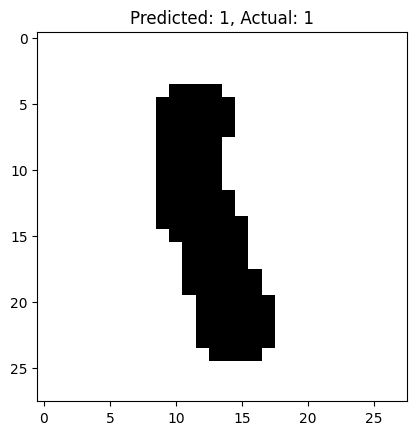

Incorrect predictions:


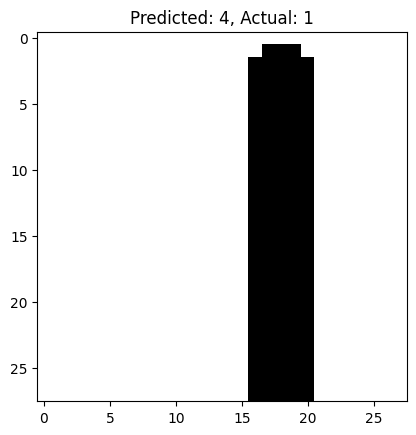

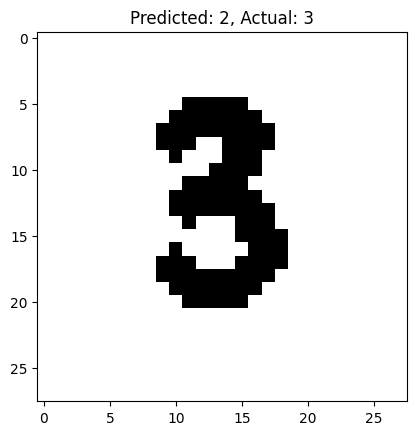

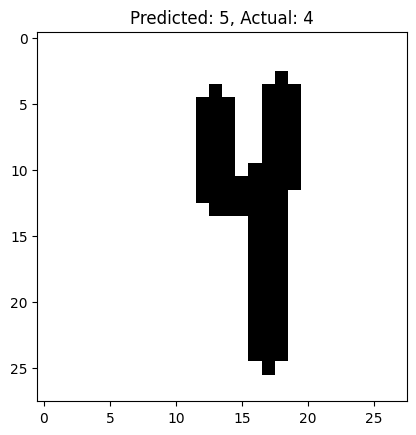

In [54]:
clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000)
clf.fit(X_train_custom, y_train_custom)

print(clf.score(X_test_custom, y_test_custom))

# Show confusion matrix
y_pred_custom = clf.predict(X_test_custom)
cm = confusion_matrix(y_test_custom, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print("Correct predictions:")

# Show some correct predictions and the actual images and label
correct = 0
attempts = 0
while correct < 3 and attempts < 100:
    index = random.randint(0, len(X_test_custom) - 1)
    pred = clf.predict([X_test_custom[index]])
    if pred == y_test_custom[index]:
        correct += 1
        img = X_test_custom[index].reshape(28, 28)
        plt.imshow(img, cmap="gray")
        plt.title(f"Predicted: {pred[0]}, Actual: {y_test_custom[index]}")
        plt.show()

print("Incorrect predictions:")

# Show some incorrect predictions and the actual images and label
incorrect = 0
attempts = 0
while incorrect < 3 and attempts < 100:
    index = random.randint(0, len(X_test_custom) - 1)
    pred = clf.predict([X_test_custom[index]])
    if pred != y_test_custom[index]:
        incorrect += 1
        img = X_test_custom[index].reshape(28, 28)
        plt.imshow(img, cmap="gray")
        plt.title(f"Predicted: {pred[0]}, Actual: {y_test_custom[index]}")
        plt.show()

# NN Example TF

Training data shape: (399, 784, 1)
Testing data shape: (100, 784, 1)
Epoch 1/100


c:\Users\kflin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.1859 - loss: 2.1543 - val_accuracy: 0.4400 - val_loss: 1.6430
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.2872 - loss: 1.7424 - val_accuracy: 0.3700 - val_loss: 1.6166
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.3105 - loss: 1.6440 - val_accuracy: 0.5000 - val_loss: 1.5705
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.2977 - loss: 1.6391 - val_accuracy: 0.5100 - val_loss: 1.4668
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.3838 - loss: 1.5360 - val_accuracy: 0.5200 - val_loss: 1.4124
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4340 - loss: 1.5028 - val_accuracy: 0.5500 - val_loss: 1.2978
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.4178 - loss: 1.4259 - val_accuracy: 0.4700 - val_loss: 1.2430
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5030 - loss: 1.2684 - val_

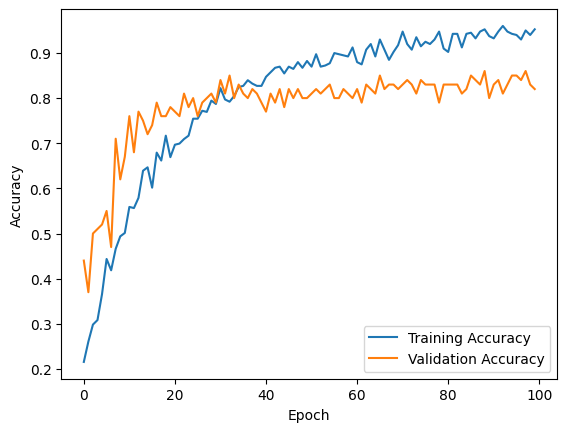

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


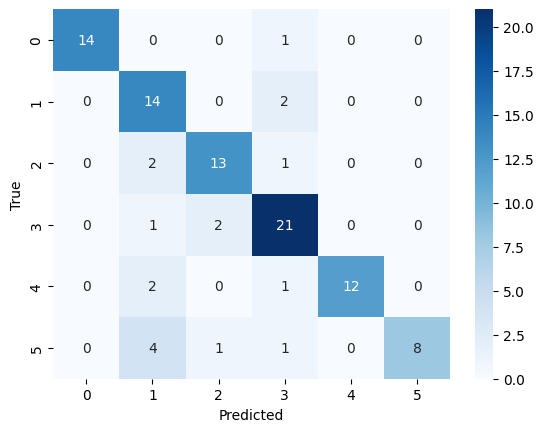

Correct predictions:


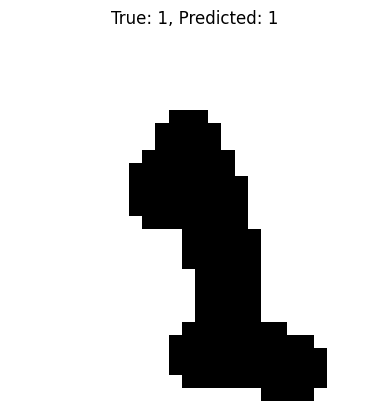

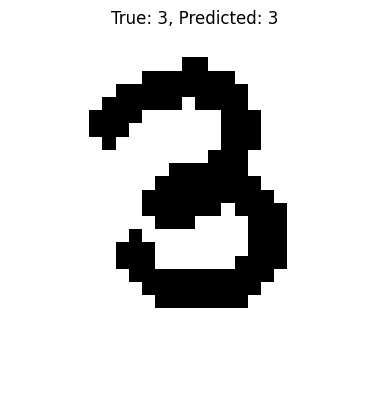

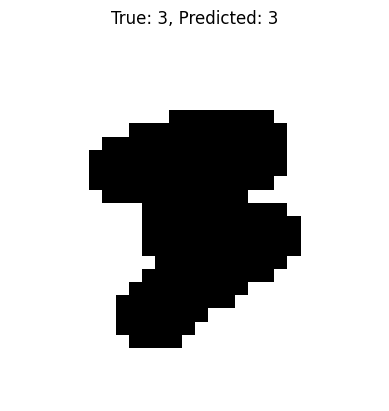

Incorrect predictions:


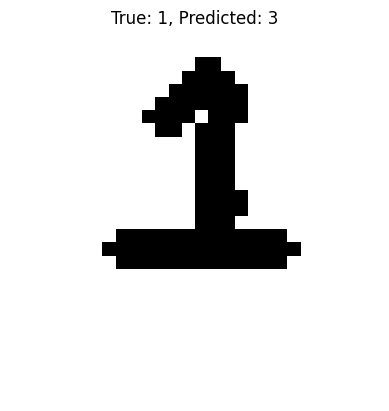

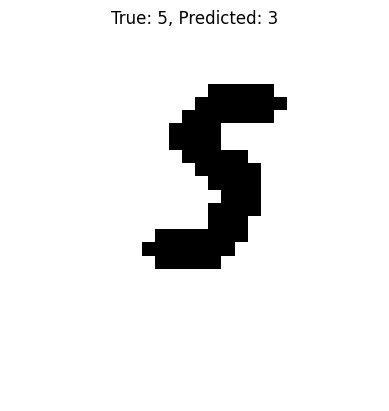

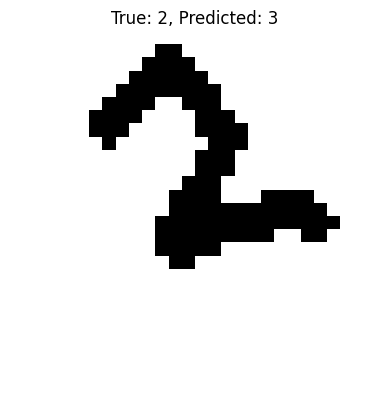

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reshape data for a simple feed-forward neural network
data_ffnn = data.reshape(-1, 28 * 28, 1)  # Flatten images to 1D (28x28 pixels)
labels_ffnn = to_categorical(labels, num_classes=6)  # One-hot encode labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_ffnn, labels_ffnn, test_size=0.2, stratify=labels)

# Normalize
X_train = X_train / 255
X_test = X_test / 255

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Build the feed-forward neural network model
model_ffnn = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(6, activation='softmax')  # Output layer for 6 classes
])

# Compile the model
model_ffnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=1)

# Evaluate the model
test_loss, test_acc = model_ffnn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history_ffnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Generate predictions and display a confusion matrix
y_pred = model_ffnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4,5], yticklabels=[0,1,2,3,4,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show some correct and incorrect predictions
def plot_sample(X, y, y_pred):
    plt.imshow(X.reshape(28, 28), cmap="gray")
    plt.title(f"True: {y}, Predicted: {y_pred}")
    plt.axis("off")
    plt.show()

# Show some correct predictions
print("Correct predictions:")
correct = np.where(y_true == y_pred_classes)[0]
for i in range(min(3, len(correct))):
    idx = correct[i]
    plot_sample(X_test[idx].reshape(28, 28), y_true[idx], y_pred_classes[idx])

# Show some incorrect predictions
print("Incorrect predictions:")
incorrect = np.where(y_true != y_pred_classes)[0]
for i in range(min(3, len(incorrect))):
    idx = incorrect[i]
    plot_sample(X_test[idx].reshape(28, 28), y_true[idx], y_pred_classes[idx])


# CNN

Epoch 1/40


c:\Users\kflin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2043 - loss: 1.8021 - val_accuracy: 0.2700 - val_loss: 1.7074
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2840 - loss: 1.6894 - val_accuracy: 0.6800 - val_loss: 1.3011
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5949 - loss: 1.1275 - val_accuracy: 0.7200 - val_loss: 0.8313
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.8537 - val_accuracy: 0.8400 - val_loss: 0.4906
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.5772 - val_accuracy: 0.8900 - val_loss: 0.3735
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.4968 - val_accuracy: 0.9100 - val_loss: 0.3057
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.3421 - val_accuracy: 0.9200 - val_loss: 0.2609
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.3252 - val_accuracy: 0.9100 - val_loss: 0.2259
Epo

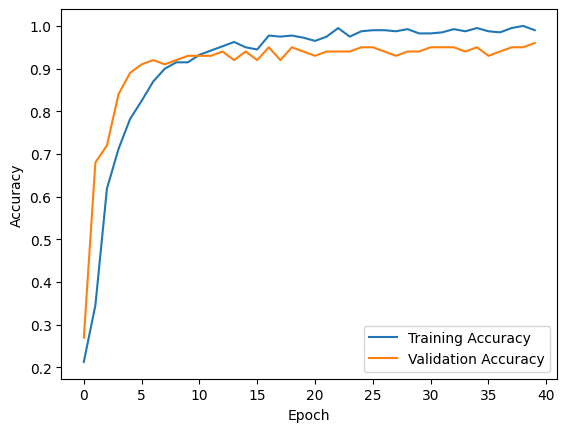

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


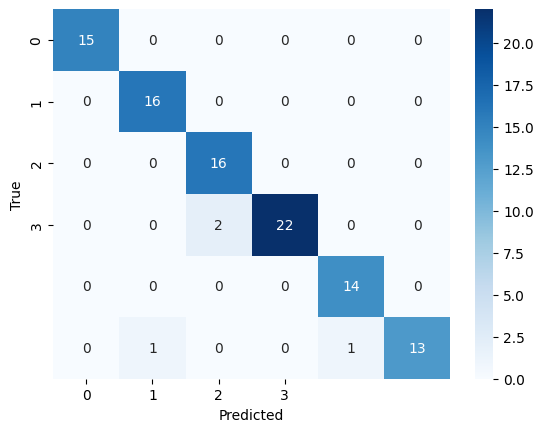

Correct predictions:


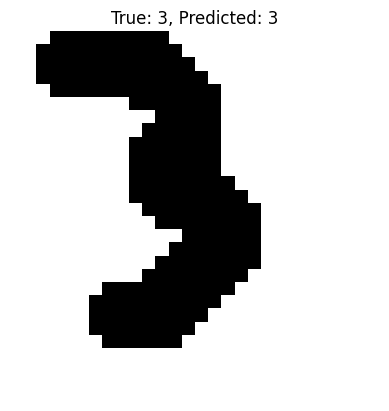

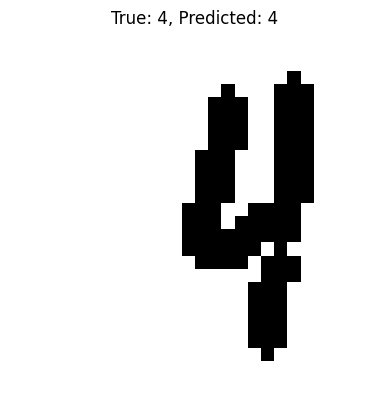

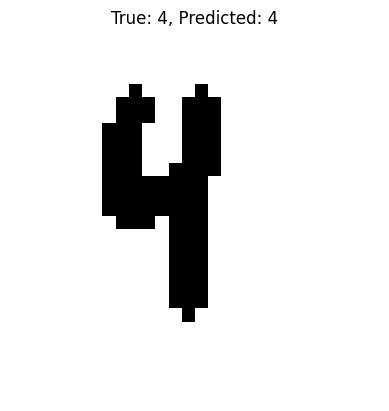

Incorrect predictions:


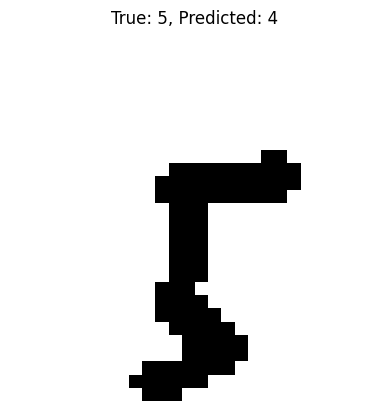

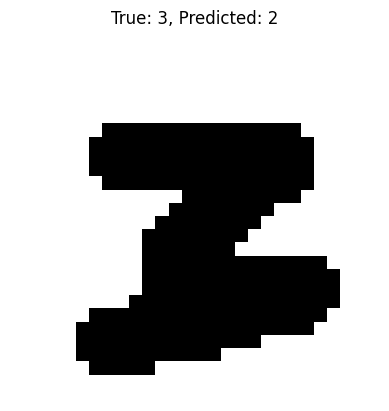

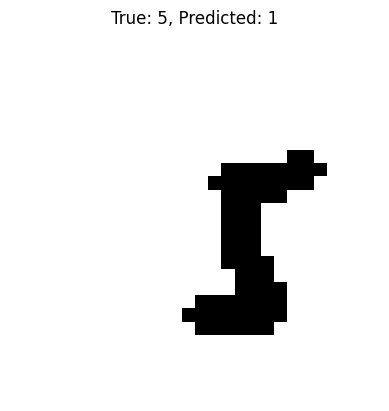

In [61]:
# Reshape data for CNN
data_cnn = data.reshape(-1, 28, 28, 1)  # Add channel dimension for grayscale images
labels_cnn = to_categorical(labels, num_classes=6)  # One-hot encode labels for 4 classes (0, 1, 2, 3)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_cnn, labels_cnn, test_size=0.2, stratify=labels)

# Normalize
X_train = X_train / 255
X_test = X_test / 255

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), batch_size=8)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Generate predictions and display a confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show some correct and incorrect predictions
def plot_sample(X, y, y_pred):
    plt.imshow(X.reshape(28, 28), cmap="gray")
    plt.title(f"True: {y}, Predicted: {y_pred}")
    plt.axis("off")
    plt.show()

# Show some correct predictions
print("Correct predictions:")
correct = np.where(y_true == y_pred_classes)[0]
for i in range(min(3, len(correct))):
    idx = correct[i]
    plot_sample(X_test[idx], y_true[idx], y_pred_classes[idx])

# Show some incorrect predictions
print("Incorrect predictions:")
incorrect = np.where(y_true != y_pred_classes)[0]
for i in range(min(3, len(incorrect))):
    idx = incorrect[i]
    plot_sample(X_test[idx], y_true[idx], y_pred_classes[idx])